In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy.random as nr
import math
from scipy import stats
import scipy.stats as st
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Import library to hide warnings
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%config Completer.use_jedi = False

In [2]:
dataset = pd.read_csv("Life Expectancy Data.csv")
dataset.describe()
dataset.info()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   float64
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [3]:
dataset.shape
dataset.head()
# 1- remove all feaatures and keep one which is life expectancy as time series
#do regression between year and life expectancy alone ased on countries


(2938, 22)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#data clean
##Removing Trailing Spaces in Column Names Some column names in the dataset contains trailing space. 
def rename_col_names(x):
    out={}
    for i in x:
        out[i] = i.rstrip()
    return out
col_names = list(dataset.columns)
dataset.rename(columns=rename_col_names(col_names), inplace=True)
col_names = list(dataset.columns)
col_names

['Country',
 'Year',
 'Status',
 'Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 ' BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [5]:
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
# checking nul values
#(dataset.astype(np.object).isnull()).any()
#dataset.isna().sum()
dataset.isna().sum() / dataset.shape[0] * 100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [7]:
#Fill missing values grouped by countries.
columns_with_null = list(dataset.columns[dataset.isna().any()])
dataset[columns_with_null] = dataset.groupby('Country')[columns_with_null].transform(lambda x:x.fillna(x.mean()))
dataset

## the other method is rolling mean  which is f3= df3.fillna(df3.rolling(2,min_periods=1).mean()) 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
# Calculate the total number of null values in all of the columns
for col in dataset.columns:
    count = dataset[col].isnull().sum()
    print(col + ' ' + str(count))

Country 0
Year 0
Status 0
Life expectancy 10
Adult Mortality 10
infant deaths 0
Alcohol 17
percentage expenditure 0
Hepatitis B 144
Measles 0
 BMI 34
under-five deaths 0
Polio 0
Total expenditure 32
Diphtheria 0
 HIV/AIDS 0
GDP 405
Population 648
 thinness  1-19 years 34
 thinness 5-9 years 34
Income composition of resources 167
Schooling 163


In [10]:
##Even now some data are NaN. This is because for some countries these columns were not measured. So just drop them
dataset.dropna(inplace=True)

In [11]:
dataset.shape

(2128, 22)

##### finding out whether time has effect on the life expectancy at all!!!

In [12]:
afghan = dataset[dataset['Country'] == "Afghanistan"]

afghan = afghan.sort_values(["Year"], ascending=True)
afghan.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
15,Afghanistan,2000,Developing,54.8,321.0,88,0.01,10.424960,62.0,6532.0,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
14,Afghanistan,2001,Developing,55.3,316.0,88,0.01,10.574728,63.0,8762.0,...,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
13,Afghanistan,2002,Developing,56.2,3.0,88,0.01,16.887351,64.0,2486.0,...,36.0,7.76,36.0,0.1,187.845950,21979923.0,19.9,2.2,0.341,6.2
12,Afghanistan,2003,Developing,56.7,295.0,87,0.01,11.089053,65.0,798.0,...,41.0,8.82,41.0,0.1,198.728544,2364851.0,19.7,19.9,0.373,6.5
11,Afghanistan,2004,Developing,57.0,293.0,87,0.02,15.296066,67.0,466.0,...,5.0,8.79,5.0,0.1,219.141353,24118979.0,19.5,19.7,0.381,6.8


Coefficient of determination for afghanistan: 0.81


Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Predictor')

Text(0, 0.5, 'Target')

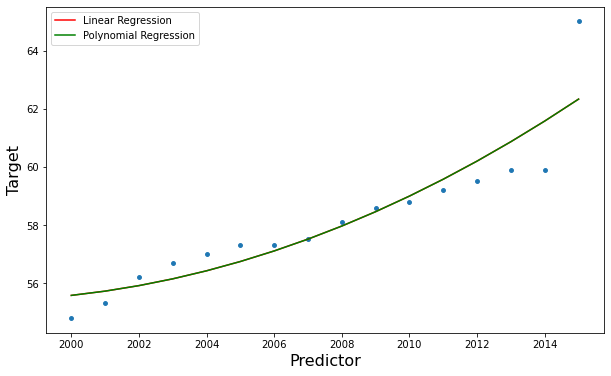

RMSE for Polynomial Regression=> 0.9160660075266335


In [13]:
### finding out whether time has effect on the life expectancy at all!!!
## for Afghanestan
afghan = dataset[dataset['Country'] == "Afghanistan"]
afghan = dataset[dataset['Country'] == "Afghanistan"]
afghan = afghan.sort_values(["Year"], ascending=True)
#afghan = afghan.reset_index().drop(['index'], axis = 1).reset_index()
#del afghan ['Year']
#afghan = afghan.rename(columns = {'index': 'Year'}, inplace = False)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
x = afghan['Year'].values.reshape(-1,1)
y = afghan['Life expectancy'].values.reshape(-1,1)

regr = linear_model.LinearRegression()
model = regr.fit(x, y)
predictions = model.predict(x)
print(f'Coefficient of determination for afghanistan: {r2_score(y, predictions):.2f}')

### trying polynoimal
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)
poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,poly_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

In [14]:
## for China
china = dataset[dataset['Country'] == "China"]
china = dataset[dataset['Country'] == "China"]
china = china.sort_values(["Year"], ascending=True)
#afghan = afghan.reset_index().drop(['index'], axis = 1).reset_index()
#del afghan ['Year']
#afghan = afghan.rename(columns = {'index': 'Year'}, inplace = False)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
x = china['Year'].values.reshape(-1,1)
y = china['Life expectancy'].values.reshape(-1,1)

regr = linear_model.LinearRegression()
model = regr.fit(x, y)
predictions = model.predict(x)
print(f'Coefficient of determination for afghanistan: {r2_score(y, predictions):.2f}')

Coefficient of determination for afghanistan: 0.97


Coefficient of determination for israel: 0.43


Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Predictor')

Text(0, 0.5, 'Target')

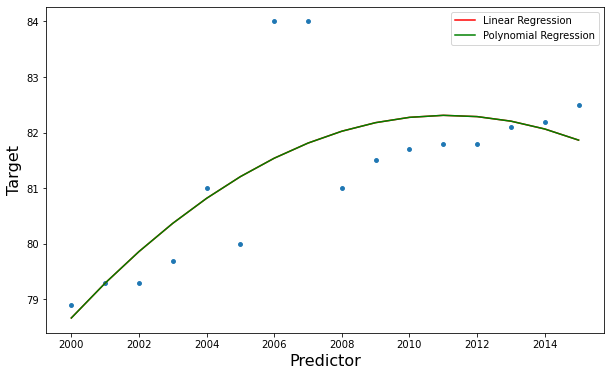

RMSE for Polynomial Regression=> 0.997619277421943


In [15]:
## for israel

afghan = dataset[dataset['Country'] == "Israel"]
afghan = dataset[dataset['Country'] == "Israel"]
afghan = afghan.sort_values(["Year"], ascending=True)
#afghan = afghan.reset_index().drop(['index'], axis = 1).reset_index()
#del afghan ['Year']
#afghan = afghan.rename(columns = {'index': 'Year'}, inplace = False)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
x = afghan['Year'].values.reshape(-1,1)
y = afghan['Life expectancy'].values.reshape(-1,1)

regr = linear_model.LinearRegression()
model = regr.fit(x, y)
predictions = model.predict(x)
print(f'Coefficient of determination for israel: {r2_score(y, predictions):.2f}')

### trying polynoimal
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)
poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,poly_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

In [16]:
# india
afghan = dataset[dataset['Country'] == "India"]
afghan = dataset[dataset['Country'] == "India"]
afghan = afghan.sort_values(["Year"], ascending=True)
#afghan = afghan.reset_index().drop(['index'], axis = 1).reset_index()
#del afghan ['Year']
#afghan = afghan.rename(columns = {'index': 'Year'}, inplace = False)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
x = afghan['Year'].values.reshape(-1,1)
y = afghan['Life expectancy'].values.reshape(-1,1)

regr = linear_model.LinearRegression()
model = regr.fit(x, y)
predictions = model.predict(x)
print(f'Coefficient of determination for india: {r2_score(y, predictions):.2f}')

Coefficient of determination for india: 1.00


Coefficient of determination for canada: 0.15


Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Predictor')

Text(0, 0.5, 'Target')

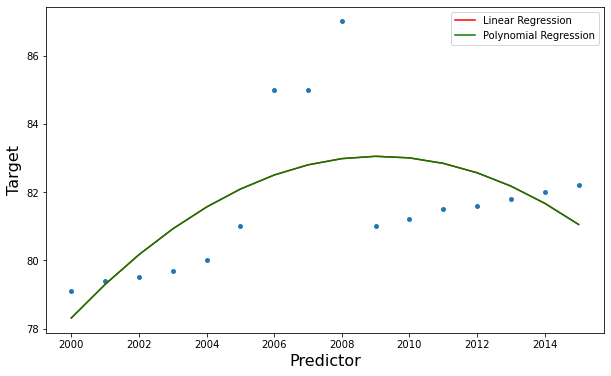

RMSE for Polynomial Regression=> 1.6806276442836598


In [17]:
# Canada

afghan = dataset[dataset['Country'] == "Canada"]
afghan = dataset[dataset['Country'] == "Canada"]
afghan = afghan.sort_values(["Year"], ascending=True)
#afghan = afghan.reset_index().drop(['index'], axis = 1).reset_index()
#del afghan ['Year']
#afghan = afghan.rename(columns = {'index': 'Year'}, inplace = False)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
x = afghan['Year'].values.reshape(-1,1)
y = afghan['Life expectancy'].values.reshape(-1,1)

regr = linear_model.LinearRegression()
model = regr.fit(x, y)
predictions = model.predict(x)
print(f'Coefficient of determination for canada: {r2_score(y, predictions):.2f}')

# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x,y)
poly_pred=pipe.predict(x)
#sorting predicted values with respect to predictor
sorted_zip = sorted(zip(x,poly_pred))
x_poly, poly_pred = zip(*sorted_zip)
#plotting predictions
plt.figure(figsize=(10,6))
plt.scatter(x,y,s=15)
plt.plot(x,poly_pred,color='r',label='Linear Regression')
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.legend()
plt.show()
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,poly_pred)))

## in the sampe there must be correlation between time and life expectancy now we can get rid of it

In [13]:
dataset = dataset.drop('Country',axis=1)
#dataset = dataset.drop("Year",axis=1)

In [14]:
dataset.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154.0,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492.0,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430.0,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787.0,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013.0,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [15]:
#(dataset.astype(np.object).isnull()).any()

In [15]:

# Calculate the total number of null values in all of the columns anew
for col in dataset.columns:
    count = dataset[col].isnull().sum()
    print(col + ' ' + str(count))

Year 0
Status 0
Life expectancy 0
Adult Mortality 0
infant deaths 0
Alcohol 0
percentage expenditure 0
Hepatitis B 0
Measles 0
 BMI 0
under-five deaths 0
Polio 0
Total expenditure 0
Diphtheria 0
 HIV/AIDS 0
GDP 0
Population 0
 thinness  1-19 years 0
 thinness 5-9 years 0
Income composition of resources 0
Schooling 0


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Life expectancy'}>,
        <AxesSubplot:title={'center':'Adult Mortality'}>,
        <AxesSubplot:title={'center':'infant deaths'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'Hepatitis B'}>,
        <AxesSubplot:title={'center':'Measles'}>],
       [<AxesSubplot:title={'center':' BMI'}>,
        <AxesSubplot:title={'center':'under-five deaths'}>,
        <AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Total expenditure'}>],
       [<AxesSubplot:title={'center':'Diphtheria'}>,
        <AxesSubplot:title={'center':' HIV/AIDS'}>,
        <AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':' thinness  1-19 years'}>,
        <AxesSubplot:title={'center':' thinness 5-9 years'}>,
        <Axes

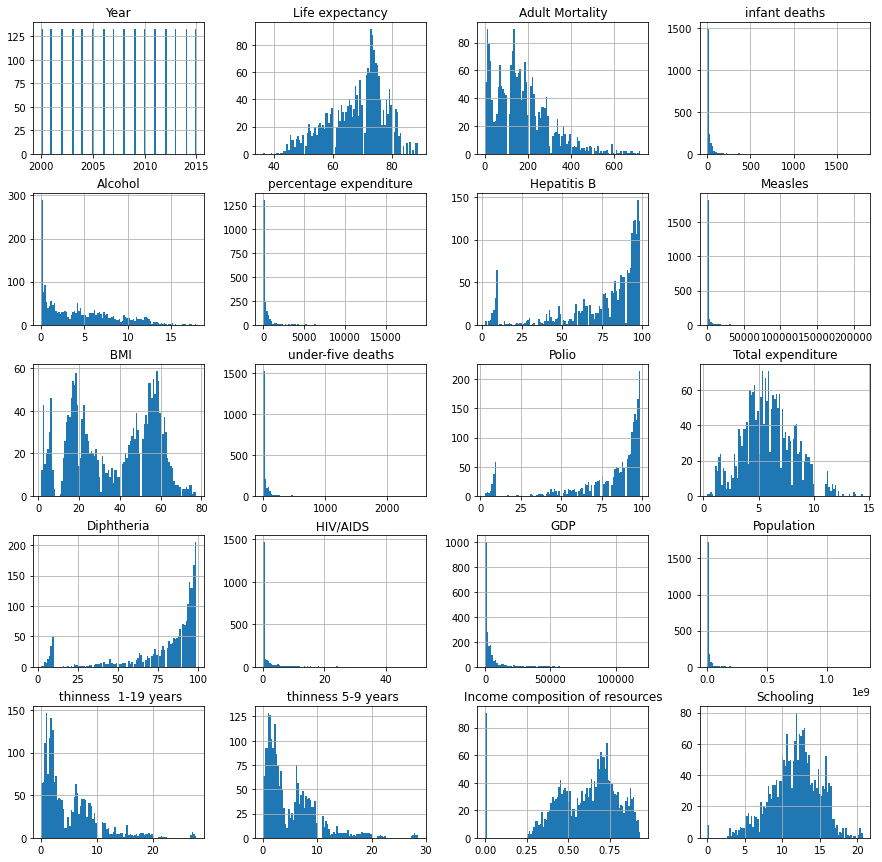

In [16]:
## distribution of data numerical
num_cols_df = dataset.select_dtypes(['int64','float64'])
cat_cols_df = dataset.select_dtypes(['object'])
num_cols_df.hist(ylabelsize = 10,figsize = (15,15),bins=100)

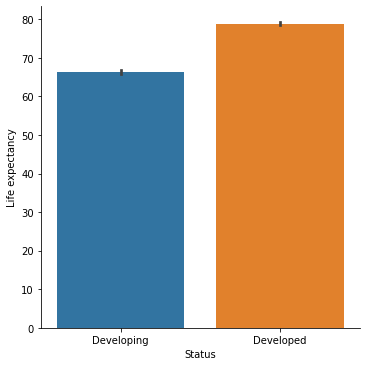

In [17]:
sns.factorplot(x = 'Status', y = 'Life expectancy', data = dataset,  kind="bar")

<AxesSubplot:>

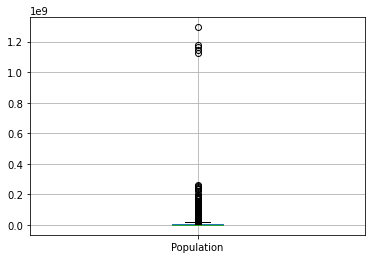

In [18]:
dg = pd.DataFrame(data = dataset, columns = ['Population'])
dg.boxplot()

In [19]:
dataset["Status"].replace({"Developing": "1", "Developed": "0"}, inplace=True)

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2128 non-null   int64  
 1   Status                           2128 non-null   object 
 2   Life expectancy                  2128 non-null   float64
 3   Adult Mortality                  2128 non-null   float64
 4   infant deaths                    2128 non-null   int64  
 5   Alcohol                          2128 non-null   float64
 6   percentage expenditure           2128 non-null   float64
 7   Hepatitis B                      2128 non-null   float64
 8   Measles                          2128 non-null   float64
 9    BMI                             2128 non-null   float64
 10  under-five deaths                2128 non-null   int64  
 11  Polio                            2128 non-null   float64
 12  Total expenditure   

In [21]:
dataset = dataset.astype({"Status": str, "Status": int})
#dataset = dataset.astype({"Measles": int, "Measles": float})
#dataset = dataset.astype({"infant deaths": int, "infant deaths": float})
#dataset = dataset.astype({"under-five deaths" :int, "under-five deaths" : float})
dataset.rename(columns = {'Life expectancy ' : 'Life_expectancy','Adult Mortality':'Adult_Mortality', 'infant deaths' : 'Infant_death', 'Alcohol percentage':'Alcohol',  'percentage expenditure':'expenditure','Hepatitis B': 'Hepatitis','Total expenditure ':'Texpense','Diphtheria':'diphteria','HIV/AIDS':'HIV','thinness  1-19 years':'general_thinness','thinness 5-9 years':'childhood_thinness','Income composition of resources':'income'}, inplace = True)

In [22]:

dataset = dataset.astype({"Infant_death": int, "Infant_death": float})

In [23]:
dataset.shape

(2128, 21)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   2128 non-null   int64  
 1   Status                 2128 non-null   int32  
 2   Life expectancy        2128 non-null   float64
 3   Adult_Mortality        2128 non-null   float64
 4   Infant_death           2128 non-null   float64
 5   Alcohol                2128 non-null   float64
 6   expenditure            2128 non-null   float64
 7   Hepatitis              2128 non-null   float64
 8   Measles                2128 non-null   float64
 9    BMI                   2128 non-null   float64
 10  under-five deaths      2128 non-null   int64  
 11  Polio                  2128 non-null   float64
 12  Total expenditure      2128 non-null   float64
 13  diphteria              2128 non-null   float64
 14   HIV/AIDS              2128 non-null   float64
 15  GDP 

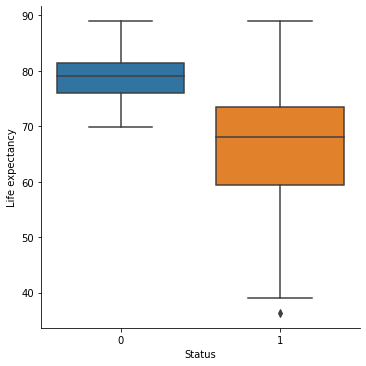

In [25]:
sns.factorplot(x = 'Status', y = 'Life expectancy', data = dataset,  kind="box")

In [28]:
df=dataset.copy()
#df = dataset.groupby(['Country']).mean()
#df.drop(['Year'],axis=1, inplace=True)
#df.round(0)

In [29]:
# Store the new length of the dataset and calculate total rows removed so far
rows = df.shape[0]
rows

2128

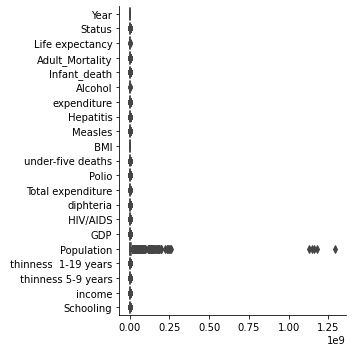

In [30]:
sns.catplot(data=df, orient="h", kind="box")

In [31]:
#find maximum population in the column see if it matches the reality!!!
maximum = df['Population'].max()
print(maximum)
# get the index position of max values in every column
maxValueIndex = df["Population"].idxmax()
print("Max values of columns are at row index position :")
print(maxValueIndex)

1293859294.0
Max values of columns are at row index position :
1187


In [32]:
# the above number is ok  India population is 1360000000.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   2128 non-null   int64  
 1   Status                 2128 non-null   int32  
 2   Life expectancy        2128 non-null   float64
 3   Adult_Mortality        2128 non-null   float64
 4   Infant_death           2128 non-null   float64
 5   Alcohol                2128 non-null   float64
 6   expenditure            2128 non-null   float64
 7   Hepatitis              2128 non-null   float64
 8   Measles                2128 non-null   float64
 9    BMI                   2128 non-null   float64
 10  under-five deaths      2128 non-null   int64  
 11  Polio                  2128 non-null   float64
 12  Total expenditure      2128 non-null   float64
 13  diphteria              2128 non-null   float64
 14   HIV/AIDS              2128 non-null   float64
 15  GDP 

In [34]:
print("Skewness of life expectancy: %f" % df['Life expectancy'].skew())
print("Kurtosis of life expectancy: %f" % df['Life expectancy'].kurt())
print("Skewness of income index: %f" % df['income'].skew())
print("Kurtosis of income index: %f" % df['income'].kurt())
print("Skewness of schooling: %f" % df['Schooling'].skew())
print("Kurtosis of schooling: %f" % df['Schooling'].kurt())
print("Skewness of adult mortality: %f" % df['Adult_Mortality'].skew())
print("Kurtosis of adult mortality: %f" % df['Adult_Mortality'].kurt())
print("Skewness of infant death: %f" % df['Infant_death'].skew())
print("Kurtosis of infant death: %f" % df['Infant_death'].kurt())
print("Skewness of BMI: %f" % df[' BMI'].skew())
print("Kurtosis of BMI: %f" % df[' BMI'].kurt())

Skewness of life expectancy: -0.538409
Kurtosis of life expectancy: -0.326438
Skewness of income index: -1.014156
Kurtosis of income index: 1.215059
Skewness of schooling: -0.371151
Kurtosis of schooling: 0.320793
Skewness of adult mortality: 1.138539
Kurtosis of adult mortality: 1.647934
Skewness of infant death: 8.622015
Kurtosis of infant death: 87.913079
Skewness of BMI: -0.098378
Kurtosis of BMI: -1.354769


In [35]:
#skeness of those features with outlir
print("Skewness of population: %f" % df['Population'].skew())
print("Kurtosis of population: %f" % df['Population'].kurt())
print("Skewness of expenditure: %f" % df['expenditure'].skew())
print("Kurtosis of expenditure: %f" % df['expenditure'].kurt())
print("Skewness of GDP: %f" % df['GDP'].skew())
print("Kurtosis of GDP: %f" % df['GDP'].kurt())

Skewness of population: 15.385322
Kurtosis of population: 278.048583
Skewness of expenditure: 4.930859
Kurtosis of expenditure: 30.089084
Skewness of GDP: 4.257166
Kurtosis of GDP: 24.579483


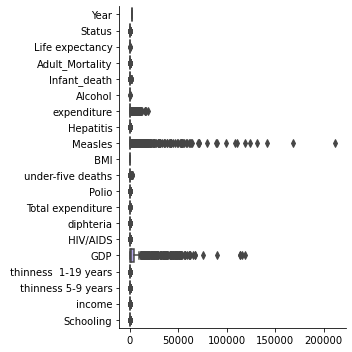

In [36]:
# as population has lot of outliers i remove it to see boxplot of other  feautres better
dt=df.copy()
dt.drop(['Population'],axis=1,inplace=True)
sns.catplot(data =dt, orient="h", kind="box")

In [37]:
###removal of outlier more than z=4
#from scipy import stats

#def drop_numerical_outliers(df, z_thresh=4):
   ##Constrains will contain `True` or `False` depending on if it is a value below the threshold.
   #Constrains = df.select_dtypes(include=[np.number]) \
       #.apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, reduce=False) \
       #.all(axis=1)
    ##Drop (inplace) values set to be rejected
   #df.drop(df.index[~constrains], inplace=True)

In [38]:
#population, GDP,Measles, expenditure  have large outliers which have to be removed
# Calculate the 25th and 75th quartiles of the population
Q1_population, Q1_GDP = df['Population'].quantile(0.25), df['GDP'].quantile(0.25)
Q3_population, Q3_GDP= df['Population'].quantile(0.75), df['GDP'].quantile(0.75)

# Determine the Interquartile range to filter out records outside of ~3 standard deviations
IQR_population, IQR_GDP = Q3_population - Q1_population, Q3_GDP - Q1_GDP

# Remove records where the data are not within ~3 standard deviations
# IQR method removes more outliers than Z-score since it looks at about 2.7 instead of 3 standard deviations
df = df[(df['Population'] >= Q1_population - (2 * IQR_population)) & (df['GDP'] >= Q1_GDP - (2 * IQR_GDP))]
df = df[(df['Population'] <= Q3_population + (2 * IQR_population)) & (df['GDP'] <= Q1_GDP + (2 * IQR_GDP))]

#population, GDP,Measles, expenditure  have large outliers which have to be removed
# Calculate the 25th and 75th quartiles of the population
Q1_expenditure = df['expenditure'].quantile(0.25)
Q3_expenditure = df['expenditure'].quantile(0.75)

# Determine the Interquartile range to filter out records outside of ~3 standard deviations
IQR_expenditure = Q3_expenditure - Q1_expenditure

# Remove records where the data are not within ~3 standard deviations
# IQR method removes more outliers than Z-score since it looks at about 2.7 instead of 3 standard deviations
df = df[(df['expenditure'] >= Q1_expenditure - (2 * IQR_expenditure))]
df = df[(df['expenditure'] <= Q3_expenditure + (2 * IQR_expenditure))]



In [39]:
## kurtosis and skeness of population after outlier removal 

#skeness of those features with outlir
print("Skewness of population: %f" % df['Population'].skew())
print("Kurtosis of population: %f" % df['Population'].kurt())
print("Skewness of expenditure: %f" % df['expenditure'].skew())
print("Kurtosis of expenditure: %f" % df['expenditure'].kurt())
print("Skewness of GDP: %f" % df['GDP'].skew())
print("Kurtosis of GDP: %f" % df['GDP'].kurt())

Skewness of population: 1.911052
Kurtosis of population: 2.859158
Skewness of expenditure: 1.535630
Kurtosis of expenditure: 1.330935
Skewness of GDP: 1.471100
Kurtosis of GDP: 1.549659


In [40]:
# Store the new length of the dataset and calculate total rows removed so far
filtered_rows = df.shape[0]
filtered_rows
print(f'Rows removed after using IQR method: {rows - filtered_rows} which is 27 percent')


1546

Rows removed after using IQR method: 582 which is 27 percent


In [41]:
1-(1546/2128)

0.2734962406015038

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546 entries, 1 to 2937
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   1546 non-null   int64  
 1   Status                 1546 non-null   int32  
 2   Life expectancy        1546 non-null   float64
 3   Adult_Mortality        1546 non-null   float64
 4   Infant_death           1546 non-null   float64
 5   Alcohol                1546 non-null   float64
 6   expenditure            1546 non-null   float64
 7   Hepatitis              1546 non-null   float64
 8   Measles                1546 non-null   float64
 9    BMI                   1546 non-null   float64
 10  under-five deaths      1546 non-null   int64  
 11  Polio                  1546 non-null   float64
 12  Total expenditure      1546 non-null   float64
 13  diphteria              1546 non-null   float64
 14   HIV/AIDS              1546 non-null   float64
 15  GDP 

In [43]:
# Break up the datasets for visualization purposes
df_developing = df[df['Status'] == 1]
df_developed = df[df['Status'] == 0]

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='Life expectancy', ylabel='Density'>

<AxesSubplot:xlabel='Life expectancy', ylabel='Density'>

Text(0.5, 0, 'Average Life Expectancy')

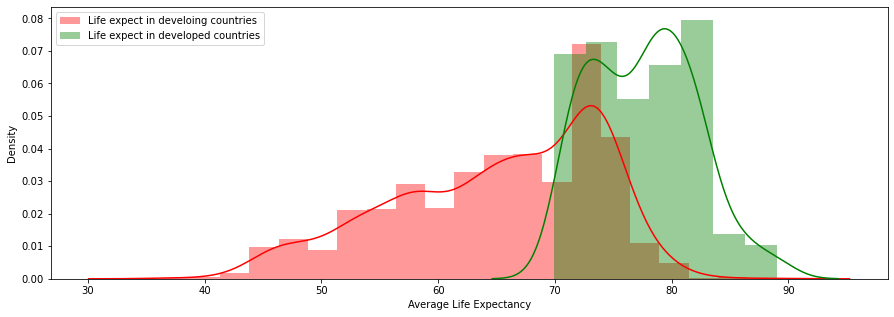

In [44]:
plt.figure(figsize=(15, 5))
sns.distplot(df_developing["Life expectancy"], color = "r", label = "Life expect in develoing countries")
sns.distplot(df_developed["Life expectancy"], color = "g", label = "Life expect in developed countries")
plt.legend()
plt.xlabel("Average Life Expectancy")

In [45]:
import numpy.random as nr
import math
from math import radians, cos, sin, asin, sqrt
from scipy import stats
# Replace region and state with a code starting at 0
df['Year'] = pd.factorize(df.Year)[0]


<Figure size 1224x576 with 0 Axes>

<AxesSubplot:>

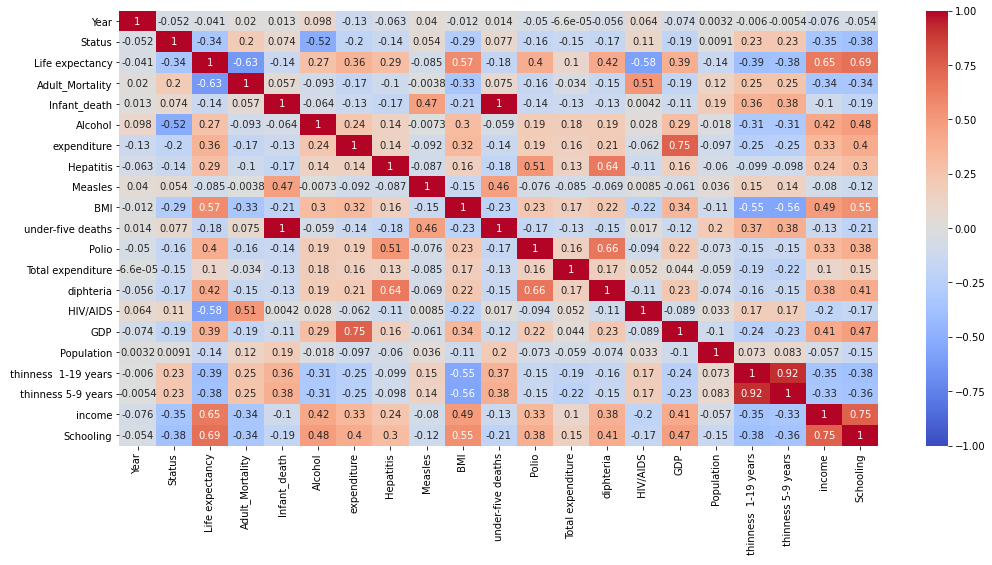

In [45]:
from sklearn.preprocessing import OrdinalEncoder

# Create an ordinal encoder and apply it to the dataframe
df_corr = df.copy()
encoder = OrdinalEncoder()
for col in df_corr.columns:
    if df[col].dtype == 'object':
        x = df_corr[col].values.reshape(-1, 1)
        df_corr[col] = encoder.fit_transform(x)
        
# Create a correlation heatmap to check correlation between all features
plt.figure(figsize=(17, 8))
sns.heatmap(df_corr.corr(), vmin=-1, cmap='coolwarm', annot=True)

,Train Accuracy,Test Accuracy
Base Model,81.601683,75.962696


Adult_Mortality          1.228257
income                   0.869773
 thinness  1-19 years    0.761461
 thinness 5-9 years      0.748946
Schooling                0.614803
 BMI                     0.600462
 HIV/AIDS                0.567774
under-five deaths        0.527621
Infant_death             0.425615
Alcohol                  0.343069
Polio                    0.286839
Hepatitis                0.258798
GDP                      0.250547
diphteria                0.249017
Population               0.212321
Total expenditure        0.187311
expenditure              0.181210
Measles                  0.129089
Year                     0.103119
Status                   0.102656
Name: MI Scores, dtype: float64

<Figure size 800x500 with 0 Axes>

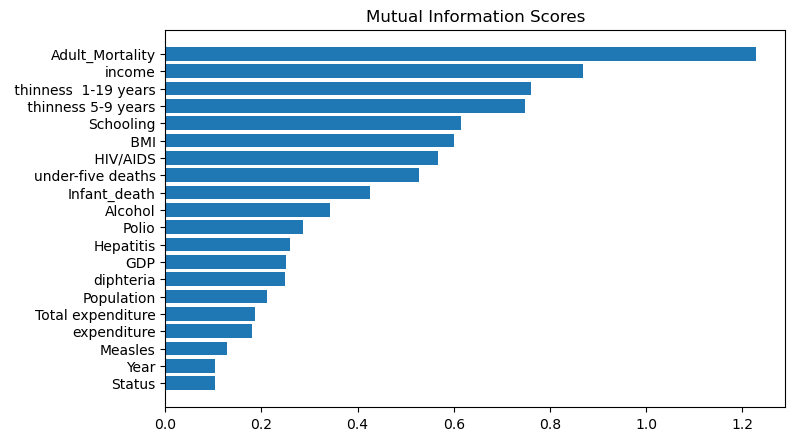

In [46]:
##Using IM score to see features dependant
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
def identify_cols(df):
    col_names = list(df.columns)
    input_cols = col_names.copy()
    input_cols.remove('Life expectancy')
    target_col = 'Life expectancy'
    #encoded_cols
    X = df[input_cols]
    Y = df[target_col]
    return  X, Y
X, Y = identify_cols(df)
model_df=pd.DataFrame()
def train_validate(X, Y,stri):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
    #X_train.shape, Y_train.shape, X_test.shape, Y_test.shape
    model = LinearRegression()
    model.fit(X_train, Y_train)
    ## train score based on R2
    df = pd.DataFrame({'Train Accuracy':[model.score(X_train, Y_train)*100],'Test Accuracy':[model.score(X_test, Y_test)*100]},index=[stri])
    return df
model_df = pd.concat([model_df, train_validate(X,Y,'Base Model')])
model_df
##MI score
discrete_features = (X.dtypes == 'int64') #finding the discrete columns
def find_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_regression(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = find_mi_scores(X, Y, discrete_features)
mi_scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks=list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores[:20])

## according to elbow rule we select the features upto GDP fr correlation

In [52]:
###  from above we trying to see if years have any effect on the life expectancy

In [53]:
# visualize the relationship between the features and the response using scatterplots
#sns.pairplot(df, x_vars = X, y_vars = Y, size=7, aspect=0.7)

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

 There are several parameters used to determine the level of economic development of a country and they include Human Development Index, income per capita, political stability, industrialization, freedom and living standards of the general population, Gross national Product (GNP), and Gross Domestic Product (GDP).. in the case of our matrix of correlation the GDP has little negative correlation with status!!
source:https://www.worldatlas.com/articles/what-is-a-developed-country.html

,Train Accuracy,Test Accuracy
Base Model,34.233856,17.107914


under-five deaths        1.054098
income                   0.147448
Alcohol                  0.126642
 thinness 5-9 years      0.106726
 thinness  1-19 years    0.100320
 BMI                     0.098432
Schooling                0.095715
Life expectancy          0.087744
 HIV/AIDS                0.069414
Adult_Mortality          0.063950
Polio                    0.045091
Infant_death             0.044657
Hepatitis                0.043655
diphteria                0.040601
expenditure              0.035966
GDP                      0.024312
Total expenditure        0.018052
Population               0.015978
Measles                  0.000000
Year                     0.000000
Name: MI Scores, dtype: float64

<Figure size 800x500 with 0 Axes>

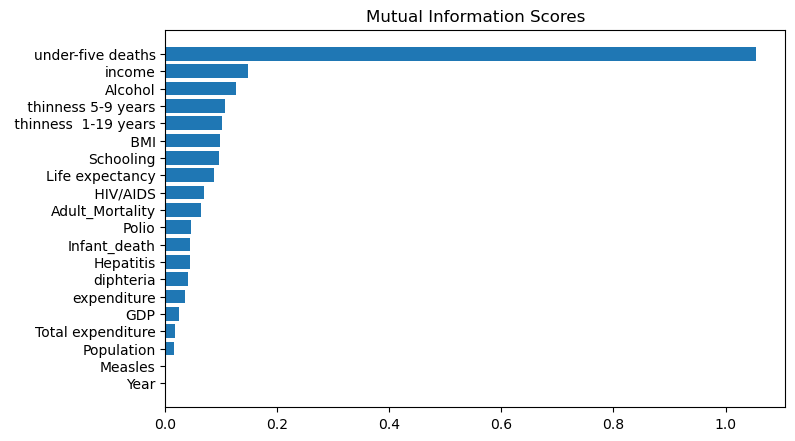

In [55]:
##Using IM score to see features have relationship on status
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression
def identify_cols(df):
    col_names = list(df.columns)
    input_cols = col_names.copy()
    input_cols.remove('Status')
    target_col = 'Status'
    #encoded_cols
    X = df[input_cols]
    Y = df[target_col]
    return  X, Y
X, Y = identify_cols(df)
model_df=pd.DataFrame()
def train_validate(X, Y,stri):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
    #X_train.shape, Y_train.shape, X_test.shape, Y_test.shape
    model = LinearRegression()
    model.fit(X_train, Y_train)
    ## train score based on R2
    df = pd.DataFrame({'Train Accuracy':[model.score(X_train, Y_train)*100],'Test Accuracy':[model.score(X_test, Y_test)*100]},index=[stri])
    return df
model_df = pd.concat([model_df, train_validate(X,Y,'Base Model')])
model_df
##MI score
discrete_features = (X.dtypes == 'int64') #finding the discrete columns
def find_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_regression(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = find_mi_scores(X, Y, discrete_features)
mi_scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks=list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')
plt.figure(dpi=100, figsize=(8,5))
plot_mi_scores(mi_scores[:20])

In [56]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546 entries, 1 to 2937
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   1546 non-null   int64  
 1   Status                 1546 non-null   int32  
 2   Life expectancy        1546 non-null   float64
 3   Adult_Mortality        1546 non-null   float64
 4   Infant_death           1546 non-null   float64
 5   Alcohol                1546 non-null   float64
 6   expenditure            1546 non-null   float64
 7   Hepatitis              1546 non-null   float64
 8   Measles                1546 non-null   float64
 9    BMI                   1546 non-null   float64
 10  under-five deaths      1546 non-null   int64  
 11  Polio                  1546 non-null   float64
 12  Total expenditure      1546 non-null   float64
 13  diphteria              1546 non-null   float64
 14   HIV/AIDS              1546 non-null   float64
 15  GDP 

In [57]:
##classification of status using under five, alcohol, income, scholing, thinness 1-19,BMI,life expectancy, thinness, adutmortal
##logistic regression
## 
X = df.iloc[:,[2,3,4,5,9,10,17,18,19,20]].values   
y = df.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  test_size = 0.2, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

[[  57   28]
 [  16 1135]]


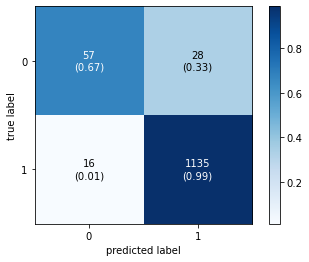

In [59]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
y_train_pre = classifier.predict(X_train)
cm2 = confusion_matrix(y_train, y_train_pre)
print(cm2)
# 100- ((3+8)/(65+24)*100)
fig, ax = plot_confusion_matrix(conf_mat=cm2,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

[[ 13   8]
 [  4 285]]


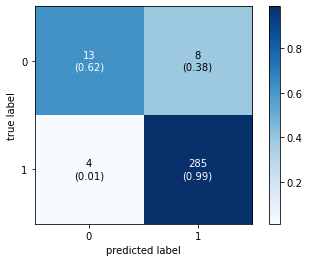

In [60]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [61]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

# Recall
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

# Precision
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)
# F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

# ROC_AUC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr, tpr, thresholds

0.9612903225806452

0.986159169550173

0.9726962457337884

0.9793814432989691

(array([0.        , 0.38095238, 1.        ]),
 array([0.        , 0.98615917, 1.        ]),
 array([2, 1, 0]))

Text(0.5, 0.98, 'ROC curve')

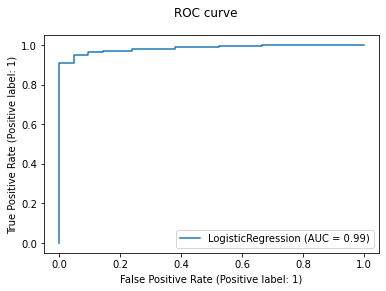

In [62]:
# ROC_AUC plot
from sklearn.metrics import plot_roc_curve
logis = plot_roc_curve(classifier, X_test, y_test)


logis.figure_.suptitle("ROC curve")
plt.show()

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, X, y, scoring='recall', cv=10, n_jobs=-1) # njobs=-1 means mximum core can be applied to the process
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.980 (0.039)


In [64]:
##classification comparison using other methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [65]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(criterion="gini", random_state=0, max_depth=5)
rfclassifier.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier
classifierdt = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth=4)
classifierdt.fit(X_train, y_train)

from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=1000)
xgb.fit(X_train, y_train)

from lightgbm import LGBMClassifier    #light version of xgboost it works faster
lgb = LGBMClassifier(n_estimators=1000)
lgb.fit(X_train, y_train)

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=1000)
gb.fit(X_train, y_train)

from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train) 

Naiv = GaussianNB()
Naiv.fit(X_train, y_train)

kn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
kn.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, random_state=0)

DecisionTreeClassifier(max_depth=4, random_state=0)

[00:43:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

LGBMClassifier(n_estimators=1000)

GradientBoostingClassifier(n_estimators=1000)

SVC(random_state=0)

GaussianNB()

KNeighborsClassifier()

Text(0.5, 0.98, 'ROC curve comparison')

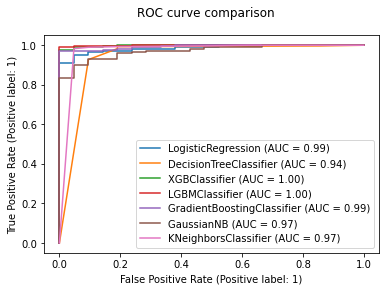

In [66]:
# ROC_AUC plot
from sklearn.metrics import plot_roc_curve


rf = plot_roc_curve(classifier, X_test, y_test) 
dt = plot_roc_curve(classifierdt, X_test, y_test, ax=rf.ax_)
xgbc = plot_roc_curve(xgb, X_test, y_test, ax=dt.ax_)
lgbc = plot_roc_curve(lgb, X_test, y_test, ax=xgbc.ax_)
gbc = plot_roc_curve(gb, X_test, y_test, ax=lgbc.ax_)
Naiv = plot_roc_curve(Naiv, X_test, y_test, ax=gbc.ax_)
k_nn = plot_roc_curve(kn, X_test, y_test, ax=Naiv.ax_)
xgbc.figure_.suptitle("ROC curve comparison")
plt.show()

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [68]:
# Create a list of classifiers to be tested with the dataset
classifiers = [['DecisionTree:',DecisionTreeClassifier()],
               ['RandomForest:',RandomForestClassifier()], 
               ['Naive Bayes:', GaussianNB()],
               ['KNeighbours:', KNeighborsClassifier()],
               ['SVM:', SVC()],
               ['LogisticRegression:', LogisticRegression()],
               ['ExtraTreesClassifier:', ExtraTreesClassifier()],
               ['AdaBoostClassifier:', AdaBoostClassifier()],
               ['GradientBoostingClassifier: ', GradientBoostingClassifier()],
               ['XGB:', XGBClassifier()], 
               ['KNN:', KNeighborsClassifier()]]

# Create a dataframe for predictions and fill in the actual data for comparison
predictions_df = pd.DataFrame()
predictions_df['actual_labels'] = y_test
# Create a dataframe to store the metrics results
metrics_df = pd.DataFrame()

# Loop through all classifiers, train, test, and validate the classifier
for name, classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average = 'weighted')
    cv_score = cross_val_score(classifier, X_test, y_test, cv=10)
    scores_df = pd.DataFrame([[name.strip(" :"), accuracy, cv_score.mean(), precision, recall, f1]])
    metrics_df = metrics_df.append(scores_df)
    
# Clean up the metrics dataframe and display
# Logistic regressions is the best model using stratification with the highest cross-validated accuracy
# and F1 score
metrics_df.columns = ['Classifier', 'Accuracy', 'CV Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_df

DecisionTreeClassifier()

RandomForestClassifier()

GaussianNB()

KNeighborsClassifier()

SVC()

LogisticRegression()

ExtraTreesClassifier()

AdaBoostClassifier()

GradientBoostingClassifier()

[00:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

[00:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

KNeighborsClassifier()

,Classifier,Accuracy,CV Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.970968,0.967742,0.976190,0.993080,0.969131
0,RandomForest,0.983871,0.977419,0.986301,0.996540,0.983292
0,Naive Bayes,0.825806,0.825806,1.000000,0.813149,0.865823
0,KNeighbours,0.980645,0.970968,0.986254,0.993080,0.980195
0,SVM,0.970968,0.967742,0.982759,0.986159,0.970639
0,LogisticRegression,0.961290,0.961290,0.972696,0.986159,0.959386
0,ExtraTreesClassifier,0.993548,0.977419,0.993127,1.000000,0.993398
0,AdaBoostClassifier,0.983871,0.967742,0.986301,0.996540,0.983292
0,GradientBoostingClassifier,0.977419,0.967742,0.979592,0.996540,0.975990
0,XGB,0.987097,0.970968,0.989691,0.996540,0.986796


K-Means Clustering to see if it predicts status

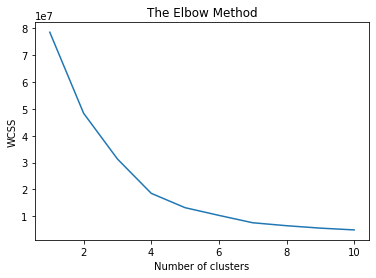

In [69]:
X = df.iloc[:,[2,3,4,5,9,10,17,18,19,20]].values 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)# k-means++  is the best math method to skip the clustering trap
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ will calculate (get) the WCSS
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show();

In [70]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
y = df.iloc[:,[1]].values 
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y, y_kmeans)

# Recall
from sklearn.metrics import recall_score
recall_score(y,y_kmeans)

# Precision
from sklearn.metrics import precision_score
precision_score(y, y_kmeans)
# F1 Score
from sklearn.metrics import f1_score
f1_score(y, y_kmeans)


0.07761966364812418

0.009722222222222222

1.0

0.01925722145804677

#Using multi linear regression to predict life expectancy

In [47]:
#making categorical to dummi
df = df.astype({"Status": int, "Status": str})
dummy=pd.get_dummies(df, prefix=['col1'])

In [48]:
df.head()

,Year,Status,Life expectancy,Adult_Mortality,Infant_death,Alcohol,expenditure,Hepatitis,Measles,BMI,...,Polio,Total expenditure,diphteria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,income,Schooling
1,0,1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
3,1,1,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2,1,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,3,1,58.8,279.0,74.0,0.01,79.679367,66.0,1989.0,16.7,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,4,1,58.6,281.0,77.0,0.01,56.762217,63.0,2861.0,16.2,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9


In [49]:
dummy.head()

,Year,Life expectancy,Adult_Mortality,Infant_death,Alcohol,expenditure,Hepatitis,Measles,BMI,under-five deaths,...,diphteria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,income,Schooling,col1_0,col1_1
1,0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
3,1,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
5,3,58.8,279.0,74.0,0.01,79.679367,66.0,1989.0,16.7,102,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,0,1
6,4,58.6,281.0,77.0,0.01,56.762217,63.0,2861.0,16.2,106,...,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9,0,1


##linear regression using features withouth status, measle, expenditure, total expenditu which are indices 0,5,7,11

In [50]:
X = dummy.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
y = dummy.iloc[:,[1]].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20, random_state = 42)
# # Feature Scaling
#Fit.transform is fitting the scaler (Z value) to the data and then transforming. While transform is using the fitted scaler to just transform the data.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_train)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_pred, squared=False)
from sklearn import linear_model
import statsmodels.api as sm
#2,18,19
model = sm.OLS(y_train,X_train).fit() 
print_model = model.summary()
print(print_model)

LinearRegression()

0.4289325967306833

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.816
Model:                            OLS   Adj. R-squared (uncentered):              0.813
Method:                 Least Squares   F-statistic:                              269.7
Date:                Sun, 29 Aug 2021   Prob (F-statistic):                        0.00
Time:                        01:32:51   Log-Likelihood:                         -707.59
No. Observations:                1236   AIC:                                      1455.
Df Residuals:                    1216   BIC:                                      1558.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
##insignificant xs are deleted


In [52]:
X = dummy.iloc[:,[0,2,3,4,7,8,9,11,12,17,18,19,20,21]].values
y = dummy.iloc[:,[1]].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
# # Feature Scaling
#Fit.transform is fitting the scaler (Z value) to the data and then transforming. While transform is using the fitted scaler to just transform the data.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_train)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_pred, squared=False)
from sklearn import linear_model
import statsmodels.api as sm
#2,18,19
model = sm.OLS(y_train,X_train).fit() 
print_model = model.summary()
print(print_model)

LinearRegression()

0.5301475041607375

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.719
Model:                            OLS   Adj. R-squared (uncentered):              0.716
Method:                 Least Squares   F-statistic:                              240.6
Date:                Sun, 29 Aug 2021   Prob (F-statistic):                        0.00
Time:                        01:32:58   Log-Likelihood:                         -969.44
No. Observations:                1236   AIC:                                      1965.
Df Residuals:                    1223   BIC:                                      2031.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [53]:
## final removal of insignificant features

In [56]:
dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1546 entries, 1 to 2937
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   1546 non-null   int64  
 1   Life expectancy        1546 non-null   float64
 2   Adult_Mortality        1546 non-null   float64
 3   Infant_death           1546 non-null   float64
 4   Alcohol                1546 non-null   float64
 5   expenditure            1546 non-null   float64
 6   Hepatitis              1546 non-null   float64
 7   Measles                1546 non-null   float64
 8    BMI                   1546 non-null   float64
 9   under-five deaths      1546 non-null   int64  
 10  Polio                  1546 non-null   float64
 11  Total expenditure      1546 non-null   float64
 12  diphteria              1546 non-null   float64
 13   HIV/AIDS              1546 non-null   float64
 14  GDP                    1546 non-null   float64
 15  Popu

In [54]:
#  features adult mortality,  alcohol, BMI, underfive death, AIDS, income, schooling are significant features

In [56]:
X = dummy.iloc[:,[2,8,9,13,18,19]].values
y = dummy.iloc[:,[1]].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, shuffle=True)
# # Feature Scaling
#Fit.transform is fitting the scaler (Z value) to the data and then transforming. While transform is using the fitted scaler to just transform the data.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)
# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred=regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
#mean_squared_error(y_train, y_pred, squared=False)
from sklearn import linear_model
import statsmodels.api as sm
#2,18,19
model = sm.OLS(y_train,X_train).fit() 
print_model = model.summary()
print(print_model)

LinearRegression()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.781
Model:                            OLS   Adj. R-squared (uncentered):              0.780
Method:                 Least Squares   F-statistic:                              638.7
Date:                Sun, 29 Aug 2021   Prob (F-statistic):                        0.00
Time:                        12:57:26   Log-Likelihood:                         -714.22
No. Observations:                1082   AIC:                                      1440.
Df Residuals:                    1076   BIC:                                      1470.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [57]:
from sklearn import linear_model
import statsmodels.api as sm
model = sm.OLS(y_test,X_test).fit()
#predictions = model.predict(X_test)
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              236.2
Date:                Sun, 29 Aug 2021   Prob (F-statistic):                   1.01e-136
Time:                        12:57:35   Log-Likelihood:                         -324.05
No. Observations:                 464   AIC:                                      660.1
Df Residuals:                     458   BIC:                                      684.9
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [58]:
rmse = np.sqrt(MSE(sc_y.inverse_transform(y_test),sc_y.inverse_transform(regressor.predict(X_test))))
print("RMSE : % f" %(rmse))
#mean_squared_error(sc_y.inverse_transform(y_test),sc_y.inverse_transform(regressor.predict(X_test), squared=False)


RMSE :  4.597970


In [59]:
#y_pred = regressor.predict(X_test)
#np.set_printoptions(precision=2)
#print(np.concatenate((y_pred.reshape(len(sc_y.inverse_transform(y_pred)),1), y_test.reshape(len(sc_y.inverse_transform(y_test)),1)),1))

In [60]:
#10 fold cross validation
from sklearn.model_selection import cross_val_score
X = dummy.iloc[:,[2,8,9,13,18,19]].values
y = dummy.iloc[:,[1]].values
scores = cross_val_score(regressor,X,y, scoring='r2', cv=10)
acura=np.mean(scores)  
print(acura)

0.7156293988485631


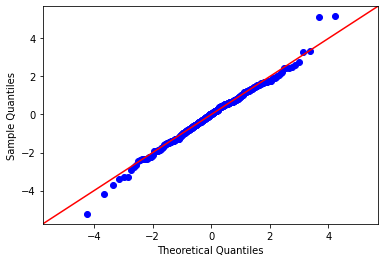

In [61]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
res = model.resid
fig = sm.qqplot(res, stats.t, fit=True, line="45")
plt.show()

In [62]:
import numpy.random as nr
import math
from math import radians, cos, sin, asin, sqrt
from scipy import stats


In [63]:
y_test.shape

(464, 1)

In [64]:
# Create a function to print basic metrics for machine learning model evaluation
def print_metrics(y_true, y_predicted, n_parameters):
    plt.figure(figsize=(15, 5))
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
# Create a function to generate a histogram of errors to view the distribution of residuals
def hist_resids(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1, 1), y_score.reshape(-1,1))
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
# Create a function to generate a plot of predicted values and residuals
def resid_plot(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1)) ##(-1,1) makes it 2d martix with one column and n row
    sns.regplot(y_score, resids, fit_reg=False, scatter_kws={'alpha':0.1})
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()

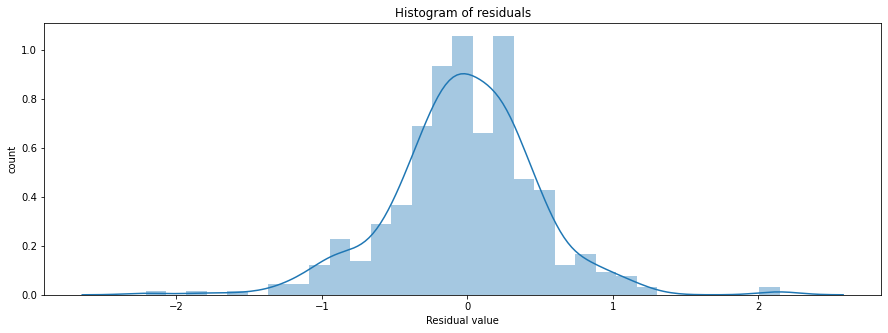

In [65]:
hist_resids(y_test, y_pred)

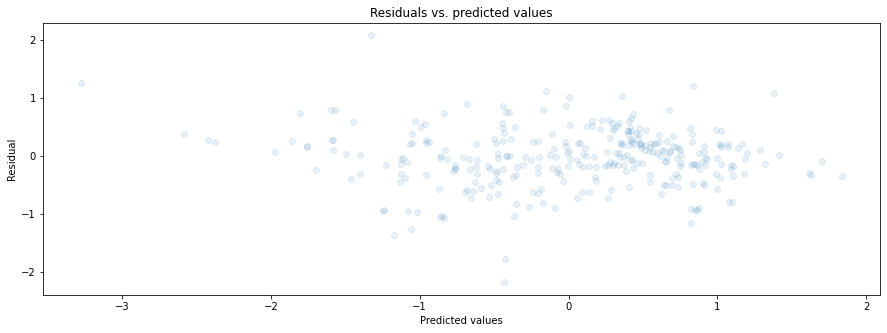

In [69]:
# View the residuals of predicted values
# Outliers were predicted incorrectly causing the high RMSE
resid_plot(y_test, y_pred)

Laso Regression

In [70]:
from sklearn.linear_model import LassoCV
X = dummy.iloc[:,[2,8,9,13,18,19]].values
y = dummy.iloc[:,[1]].values
lasso = LassoCV(cv=5).fit(X, y)
lasso.score(X, Y)

0.7558409252370197

#Ridge regression

In [71]:
from sklearn.linear_model import RidgeCV
X = dummy.iloc[:,[2,8,9,13,18,19]].values
y = dummy.iloc[:,[1]].values
ridge = RidgeCV(cv=5).fit(X, y)
ridge.score(X, Y)

0.7715181782488517

In [124]:
#  linear regresssion is not a good model!

In [125]:
#import numpy
#from sklearn.metrics import r2_score
#rmse = np.sqrt(MSE(sc_y.inverse_transform(y_test),sc_y.inverse_transform(regressor.predict(X_test))))
#print("RMSE : % f" %(rmse))


In [126]:
#10 fold cross validation
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(regressor,X,y, scoring='r2', cv=10)
#scores
#r_2=np.mean(scores)  
#print(r_2)

#polynomial 

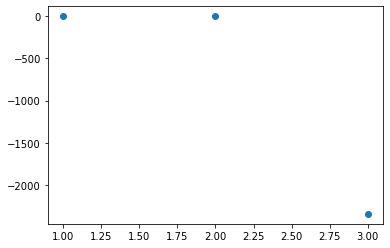

In [127]:
### we want to find which degree of polynoial has etter cross validation
from sklearn.preprocessing import PolynomialFeatures
X = dummy.iloc[:,[2,3,4,8,9,12,18,19,20,21]].values
y = dummy.iloc[:,[1]].values
def create_polynomial_regression_model(degree):
 poly_features = PolynomialFeatures(degree=degree)
 X_poly = poly_features.fit_transform(X)
 poly = LinearRegression()
 return np.mean(cross_val_score(poly, X_poly, y, cv=5))
poly_cv = []
for i in range(1,4):
 poly_cv.append(create_polynomial_regression_model(i))
plt.scatter(range(1,4),poly_cv)

In [84]:
## above graph says that polynomial degree of 2 has the highest CV score

In [126]:
#training with feautres
from sklearn.linear_model import LinearRegression
X = dummy.iloc[:,[2,3,4,8,9,12,18,19,20,21]].values
y = dummy.iloc[:,[1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# # Feature Scaling
#Fit.transform is fitting the scaler (Z value) to the data and then transforming. While transform is using the fitted scaler to just transform the data.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)
from sklearn.linear_model import LinearRegression
#lin_reg = LinearRegression()
#lin_reg.fit(X_train, y_train)
#lin_reg = LinearRegression()
#lin_reg.fit(X_train, y_train)
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
Xp = poly_reg.fit_transform(X_train)
pol_reg_2 = LinearRegression()
pol_reg_2.fit(Xp, y_train)

LinearRegression()

In [129]:
y_pred=pol_reg_2.predict(poly_reg.fit_transform(X_test))

In [130]:
from sklearn.metrics import mean_squared_error
#y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_train))
#mean_squared_error(y_train, y_pred)
#print(r2_score(y_train, y_pred))
rmse = np.sqrt(MSE(sc_y.inverse_transform(y_test),sc_y.inverse_transform(regressor.predict(X_test))))
print("RMSE : % f" %(rmse))


RMSE :  5.236042


In [127]:
# Create a function to generate a histogram of errors to view the distribution of residuals
def hist_resids(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1, 1), y_score.reshape(-1,1))
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
# Create a function to generate a plot of predicted values and residuals
def resid_plot(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1)) ##(-1,1) makes it 2d martix with one column and n row
    sns.regplot(y_score, resids, fit_reg=False, scatter_kws={'alpha':0.1})
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
hist_resids(y_test, y_pred)
resid_plot(y_test, y_pred)

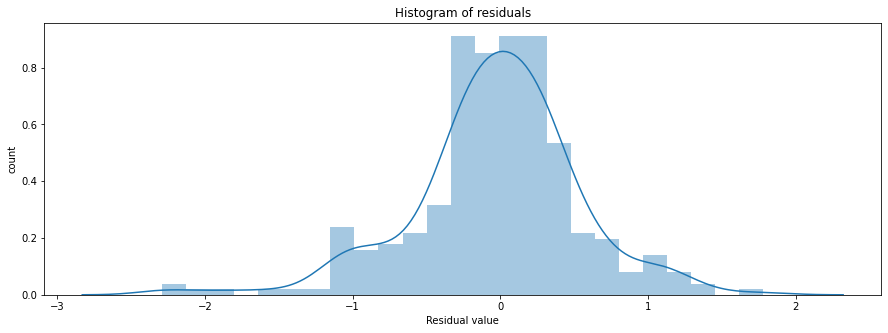

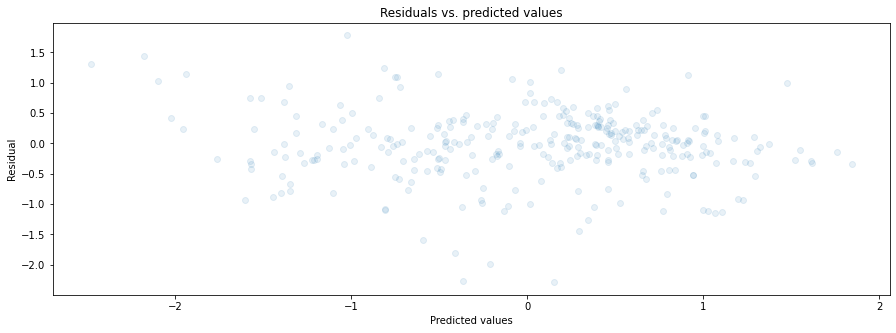

In [128]:
hist_resids(y_test, y_pred)
resid_plot(y_test, y_pred)

In [131]:
#10 fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pol_reg_2,X,y,scoring='r2', cv=10)
r_2=np.mean(scores)  
print(r_2)

0.6540851144786608


SVR rbf

In [129]:

from sklearn import metrics
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score
X = dummy.iloc[:,[2,4,8,12,13,18,19]].values
y = dummy.iloc[:,[1]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# # Feature Scaling
#Fit.transform is fitting the scaler (Z value) to the data and then transforming. While transform is using the fitted scaler to just transform the data.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)
## hypertuning test
param = {'kernel' : ('linear', 'rbf'),'C' : [1,5,10],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

modelsvr = SVR()

grids = GridSearchCV(modelsvr,param,cv=5,n_jobs= -1, verbose = 2)


import time
StartTime=time.time()

grids.fit(X_train,y_train)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')
# summarize the results of the grid search
print(grids.best_score_)
print(grids.best_params_)


In [129]:
#modeling with high correlated features 
X = dummy.iloc[:,[2,3,4,8,9,12,18,19,20,21]].values
y = dummy.iloc[:,[1]].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
# # Feature Scaling
#Fit.transform is fitting the scaler (Z value) to the data and then transforming. While transform is using the fitted scaler to just transform the data.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [133]:
#Validation
y_pred = regressor.predict(X_test)
rmse = np.sqrt(MSE(sc_y.inverse_transform(y_test),sc_y.inverse_transform(regressor.predict(X_test))))
print("RMSE : % f" %(rmse))

RMSE :  3.065810


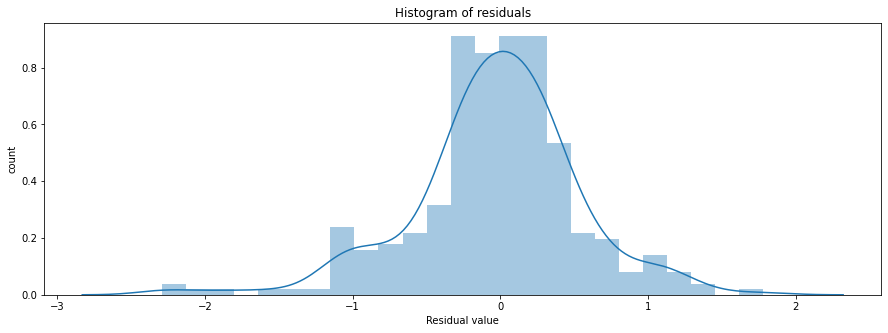

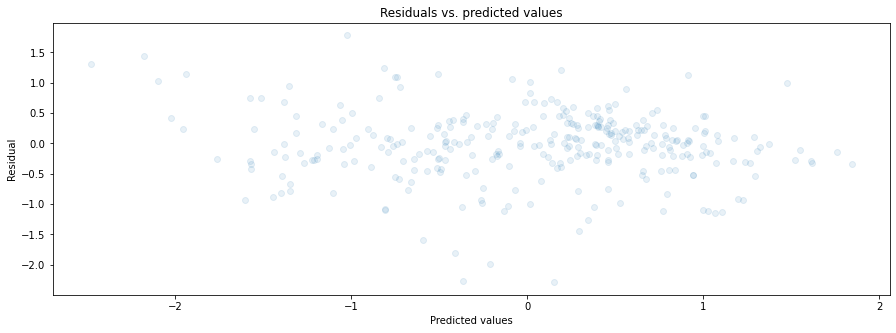

In [130]:
# Create a function to generate a histogram of errors to view the distribution of residuals
def hist_resids(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1, 1), y_score.reshape(-1,1))
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
# Create a function to generate a plot of predicted values and residuals
def resid_plot(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1)) ##(-1,1) makes it 2d martix with one column and n row
    sns.regplot(y_score, resids, fit_reg=False, scatter_kws={'alpha':0.1})
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
hist_resids(y_test, y_pred)
resid_plot(y_test, y_pred)

In [134]:
#10 fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor,X,y, scoring='r2',cv=10)

r_2=np.mean(scores)  
print(r_2)

0.6753524010809502


Decision tree

In [131]:
import numpy as np
import pandas as pd

In [132]:
X = dummy.iloc[:,[2,3,4,8,9,12,18,19,20,21]].values
y = dummy.iloc[:,[1]].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
# # Feature Scaling
#Fit.transform is fitting the scaler (Z value) to the data and then transforming. While transform is using the fitted scaler to just transform the data.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 42)
regressor.fit(X_train, y_train)
rmse = np.sqrt(MSE(sc_y.inverse_transform(y_test),sc_y.inverse_transform(regressor.predict(X_test))))
print("RMSE : % f" %(rmse))


DecisionTreeRegressor(random_state=42)

RMSE :  3.050775


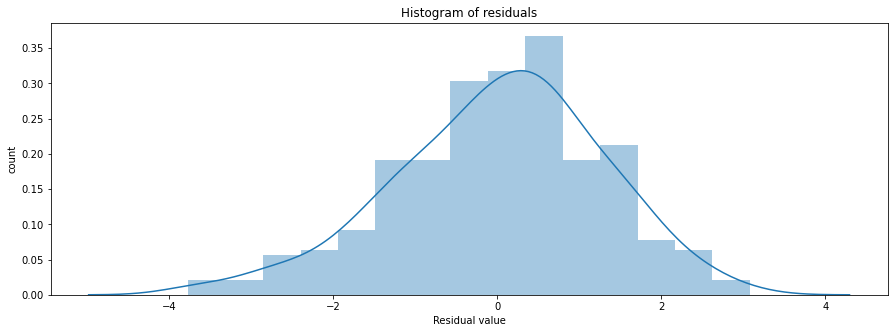

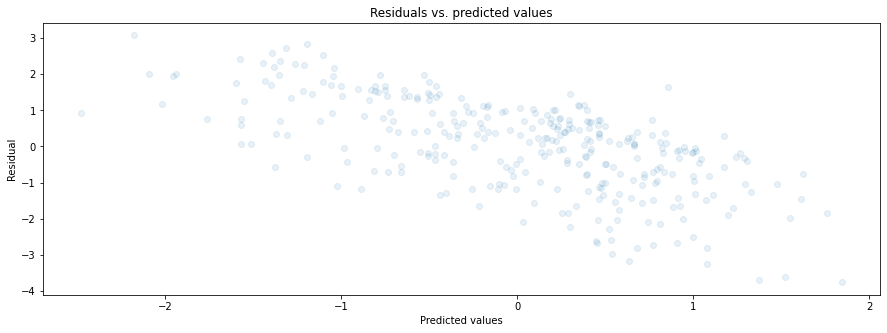

In [133]:
# Create a function to generate a histogram of errors to view the distribution of residuals
def hist_resids(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1, 1), y_score.reshape(-1,1))
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
# Create a function to generate a plot of predicted values and residuals
def resid_plot(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1)) ##(-1,1) makes it 2d martix with one column and n row
    sns.regplot(y_score, resids, fit_reg=False, scatter_kws={'alpha':0.1})
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
hist_resids(y_test, y_pred)
resid_plot(y_test, y_pred)

In [137]:
#10f cross validat
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X, y,scoring='r2', cv=10)
r_2=np.mean(scores)  
r_2

0.7503223792623681

Random Forest

In [134]:
from sklearn.ensemble import RandomForestRegressor
X = dummy.iloc[:,[2,3,4,8,9,12,18,19,20,21]].values
y = dummy.iloc[:,[1]].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
# # Feature Scaling
#Fit.transform is fitting the scaler (Z value) to the data and then transforming. While transform is using the fitted scaler to just transform the data.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)
regressor = RandomForestRegressor(n_estimators=1000, random_state=42) #1000 is amount of tree
regressor.fit(X_train, y_train)

rmse = np.sqrt(MSE(sc_y.inverse_transform(y_test),sc_y.inverse_transform(regressor.predict(X_test))))
print("RMSE : % f" %(rmse))

RandomForestRegressor(n_estimators=1000, random_state=42)

RMSE :  2.112001


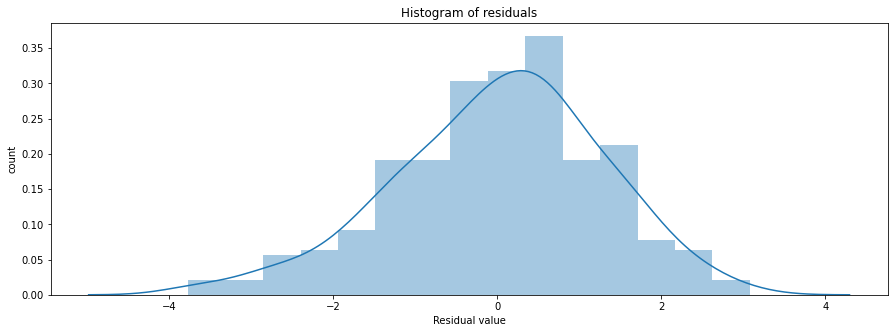

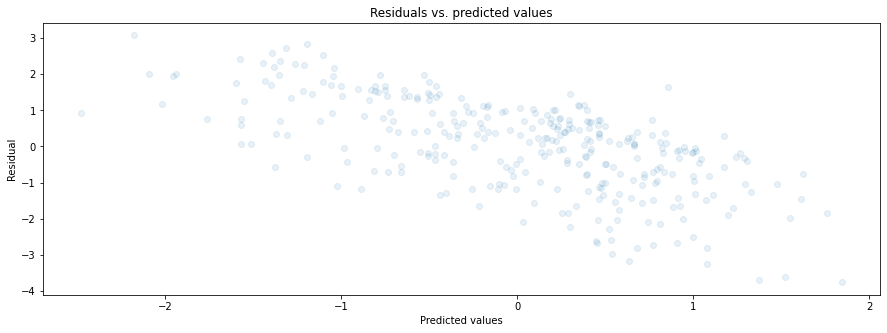

In [135]:
# Create a function to generate a histogram of errors to view the distribution of residuals
def hist_resids(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1, 1), y_score.reshape(-1,1))
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
# Create a function to generate a plot of predicted values and residuals
def resid_plot(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1)) ##(-1,1) makes it 2d martix with one column and n row
    sns.regplot(y_score, resids, fit_reg=False, scatter_kws={'alpha':0.1})
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
hist_resids(y_test, y_pred)
resid_plot(y_test, y_pred)

In [139]:
#10f cross validat
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X, y, scoring='r2', cv=10)
accuracy=np.mean(scores)  
accuracy

0.8761190319010017

In [74]:
##XGboost
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
X = dummy.iloc[:,[2,8,9,13,18,19]].values
y = dummy.iloc[:,[1]].values
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 40)
# # Feature Scaling
#Fit.transform is fitting the scaler (Z value) to the data and then transforming. While transform is using the fitted scaler to just transform the data.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)
xgb_r = xg.XGBRegressor(objective ='reg:linear',  n_estimators = 1000, seed = 123)
xgb_r.fit(X_train, y_train)
pred = xgb_r.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[13:14:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

RMSE :  0.235270


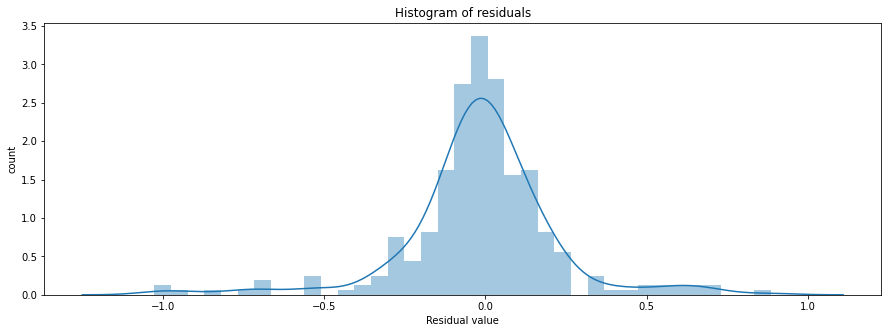

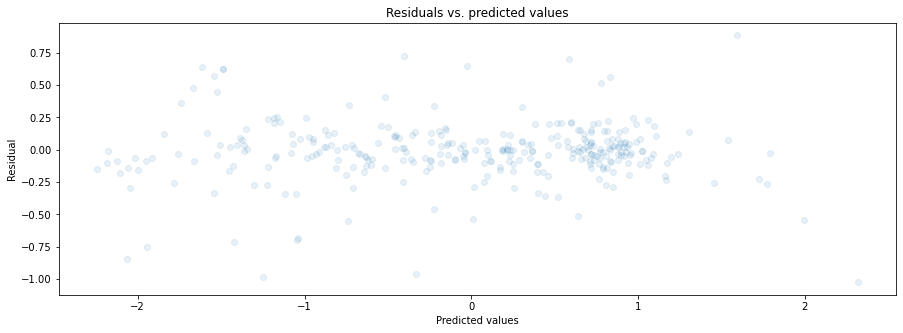

In [75]:
# Create a function to generate a histogram of errors to view the distribution of residuals
def hist_resids(y_test, pred):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1, 1), pred.reshape(-1,1))
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
# Create a function to generate a plot of predicted values and residuals
def resid_plot(y_test, pred):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1,1), pred.reshape(-1,1)) ##(-1,1) makes it 2d martix with one column and n row
    sns.regplot(pred, resids, fit_reg=False, scatter_kws={'alpha':0.1})
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
hist_resids(y_test, pred)
resid_plot(y_test, pred)

In [77]:
#10f cross validat
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
scores = cross_val_score(xgb_r, X, y,scoring='r2', cv=10)

accuracy=np.mean(scores)  
accuracy

[13:16:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:17

0.8745441581197435

##KNN regression

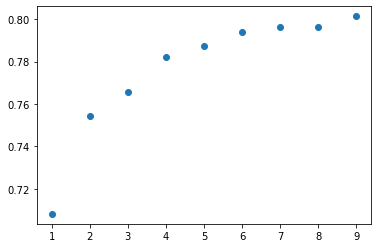

In [138]:
### cross validation for KNN model
from sklearn.neighbors import KNeighborsRegressor
X = dummy.iloc[:,[2,3,4,8,9,12,18,19,20,21]].values
y = dummy.iloc[:,[1]].values
cv_score=[]
for i in range(1,10):
 knn = KNeighborsRegressor(n_neighbors= i)
 cv_score.append(np.mean(cross_val_score(knn,X,y,cv=5)))
x = range(1,10)
plt.scatter(x,cv_score)

In [112]:
## highest CV score is for k=8

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
# # Feature Scaling
#Fit.transform is fitting the scaler (Z value) to the data and then transforming. While transform is using the fitted scaler to just transform the data.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

KNeighborsRegressor(n_neighbors=8)

RMSE :  0.351710


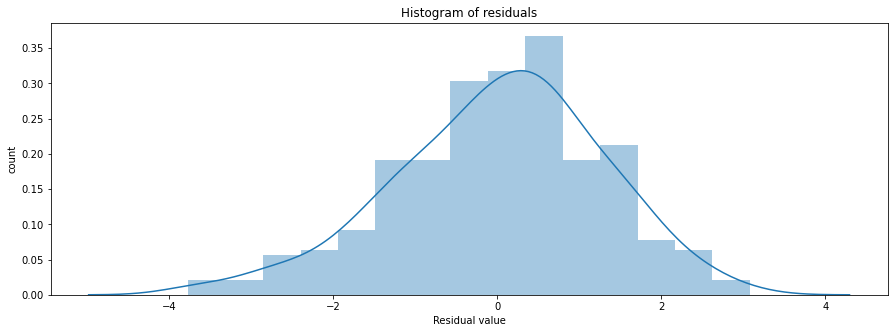

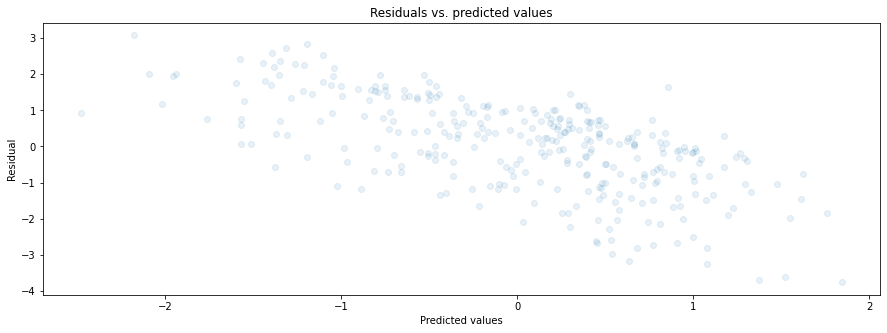

In [140]:
# Create a function to generate a histogram of errors to view the distribution of residuals
def hist_resids(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1, 1), y_score.reshape(-1,1))
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
# Create a function to generate a plot of predicted values and residuals
def resid_plot(y_test, y_score):
    plt.figure(figsize=(15, 5))
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1)) ##(-1,1) makes it 2d martix with one column and n row
    sns.regplot(y_score, resids, fit_reg=False, scatter_kws={'alpha':0.1})
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    plt.show()
hist_resids(y_test, y_pred)
resid_plot(y_test, y_pred)

In [144]:
#10f cross validat
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X, y, scoring = 'r2', cv=10)
accuracy=np.mean(scores)  
accuracy

0.8761190319010017

In [126]:
0.779810*0.779810

0.6081036361

####In[put function]

### pipeline